# ML & DL Registration / Referral ID: AIRSS1219 Full Name: Ruturaj Kondilkar College Name: K. J. Somaiya College of Engineering,Vidyavihar

# Assignment 9

## Leaf Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

In [2]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

In [3]:
df1.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [4]:
df2.head()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Columns: 193 entries, id to texture64
dtypes: float64(192), int64(1)
memory usage: 895.8 KB


In [7]:
print(df1.shape)
print(df2.shape)

(990, 194)
(594, 193)


In [8]:
df1.duplicated().sum()

0

In [9]:
df1.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [10]:
df2.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,780.673401,0.017562,0.028425,0.031858,0.022556,0.014527,0.037497,0.019222,0.001085,0.007092,...,0.035291,0.005923,0.015033,0.011762,0.015881,0.011217,0.002617,0.019975,0.009389,0.020970
std,465.646977,0.019585,0.038351,0.025719,0.028797,0.018029,0.051372,0.017122,0.002697,0.009515,...,0.064482,0.026934,0.022318,0.024771,0.014898,0.052530,0.011204,0.034704,0.013457,0.023407
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,368.500000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,774.000000,0.009766,0.010743,0.023438,0.013672,0.007812,0.013672,0.015625,0.000000,0.005859,...,0.003906,0.000000,0.005859,0.001953,0.012695,0.000000,0.000000,0.003418,0.002930,0.013184
75%,1184.500000,0.028809,0.041016,0.042969,0.027344,0.019531,0.056641,0.029297,0.000000,0.007812,...,0.038086,0.000000,0.019531,0.010498,0.022461,0.000000,0.000000,0.022461,0.014648,0.032227
max,1583.000000,0.085938,0.189450,0.167970,0.164060,0.093750,0.271480,0.087891,0.021484,0.083984,...,0.353520,0.441410,0.153320,0.177730,0.083984,0.606450,0.123050,0.247070,0.086914,0.149410


In [11]:
df1.isnull().any().sum()

0

In [12]:
df1.isnull().any().sum()

0

In [13]:
df1.columns

Index(['id', 'species', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5',
       'margin6', 'margin7', 'margin8',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=194)

In [14]:
df1['species'].nunique()

99

In [15]:
df1.corr()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,1.000000,-0.011673,-0.027565,-0.059533,0.001639,-0.002419,-0.051818,0.061214,-0.039509,-0.070954,...,-0.040292,-0.005132,-0.043101,0.063337,-0.007915,-0.000823,0.026319,0.032873,0.024299,0.035396
margin1,-0.011673,1.000000,0.806390,-0.182829,-0.297807,-0.475874,0.767718,0.066273,-0.094137,-0.181496,...,0.137158,-0.047771,0.126227,-0.024139,-0.168201,0.035072,-0.007581,-0.033159,-0.075171,0.030414
margin2,-0.027565,0.806390,1.000000,-0.204640,-0.315953,-0.444312,0.825762,-0.083273,-0.086428,-0.120276,...,0.154407,-0.021096,0.123834,-0.063654,-0.157842,0.081069,-0.007057,-0.037405,-0.098957,-0.029532
margin3,-0.059533,-0.182829,-0.204640,1.000000,0.120042,-0.185007,-0.163976,0.095449,0.024350,-0.000042,...,0.047347,-0.027618,0.007261,-0.021390,0.033505,-0.019850,0.084957,-0.081999,-0.148193,0.061780
margin4,0.001639,-0.297807,-0.315953,0.120042,1.000000,0.029480,-0.261437,-0.268271,-0.047693,0.227543,...,-0.071974,-0.009537,-0.050529,-0.044318,0.088857,-0.052317,0.320644,-0.073886,0.050970,0.014343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
texture60,-0.000823,0.035072,0.081069,-0.019850,-0.052317,0.006542,0.066262,-0.034094,0.048647,-0.028292,...,-0.129365,0.004412,-0.155187,0.240704,-0.183369,1.000000,-0.051838,0.265879,-0.089679,-0.190194
texture61,0.026319,-0.007581,-0.007057,0.084957,0.320644,-0.109229,-0.050498,-0.163375,-0.079283,0.088517,...,-0.002235,0.053707,-0.072814,-0.084638,-0.023539,-0.051838,1.000000,-0.063582,-0.068065,0.036374
texture62,0.032873,-0.033159,-0.037405,-0.081999,-0.073886,0.151675,-0.031555,0.015391,-0.048843,-0.031954,...,-0.217239,0.171577,-0.283316,0.563088,-0.128010,0.265879,-0.063582,1.000000,-0.058189,-0.245527
texture63,0.024299,-0.075171,-0.098957,-0.148193,0.050970,0.022299,-0.132087,-0.001364,0.027758,-0.119494,...,-0.207887,0.002057,-0.064724,-0.059866,0.156568,-0.089679,-0.068065,-0.058189,1.000000,0.029305


<AxesSubplot:xlabel='margin1', ylabel='species'>

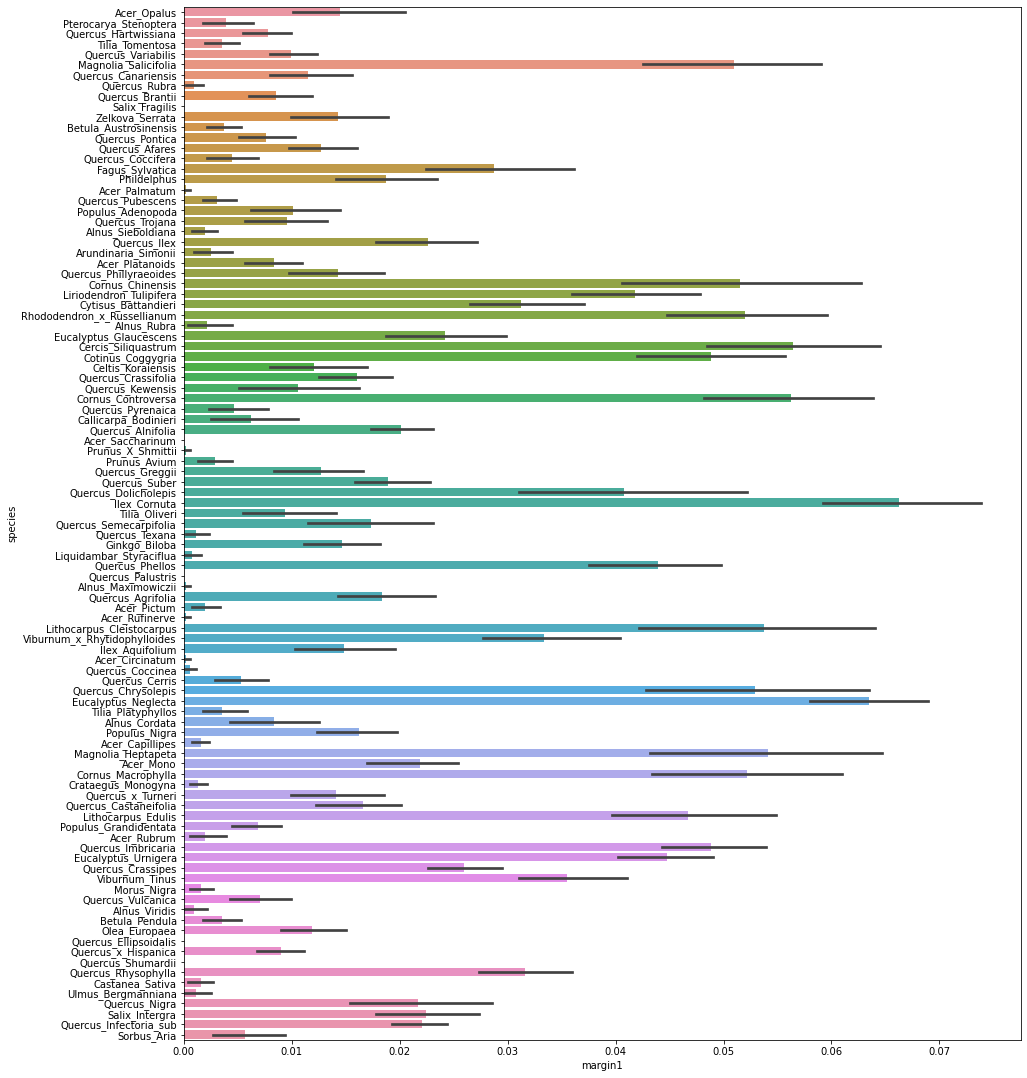

In [17]:
plt.figure(figsize = (15,19))
sns.barplot(df1['margin1'],df1['species'])

In [18]:
test_ids = df2.pop('id')

In [19]:
x = df1.drop(['species','id'],axis=1).values

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder().fit(df1['species'])
y = encoder.transform(df1['species'])
y

array([ 3, 49, 65, 94, 84, 40, 54, 78, 53, 89, 98, 16, 74, 50, 58, 31, 43,
        4, 75, 44, 83, 84, 13, 66, 15,  6, 73, 22, 73, 31, 36, 27, 94, 88,
       12, 28, 21, 25, 20, 60, 84, 65, 69, 58, 23, 76, 18, 52, 54,  9, 48,
       47, 64, 81, 83, 36, 58, 21, 81, 20, 62, 88, 34, 92, 79, 82, 20, 32,
        4, 84, 36, 35, 72, 60, 71, 72, 52, 50, 54, 11, 51, 18, 47,  5,  8,
       37, 97, 20, 33,  1, 59,  1, 56,  1,  9, 57, 20, 79, 29, 16, 32, 54,
       93, 10, 46, 59, 84, 76, 15, 10, 15,  0, 69,  4, 51, 51, 94, 36, 39,
       62,  2, 24, 26, 35, 25, 87,  0, 55, 34, 38,  1, 45,  7, 93, 56, 38,
       21, 51, 75, 81, 74, 33, 20, 37,  9, 40, 60, 31, 83, 50, 71, 67, 30,
       66,  1, 43, 61, 23, 65, 84, 87, 46, 57, 16,  2, 28, 12, 96, 44, 76,
       29, 75, 41, 87, 67, 61, 30,  5, 12, 62,  3, 83, 81,  6, 85,  4, 37,
       57, 84, 39, 71, 61,  6, 76, 14, 31, 98, 40, 17, 51, 16, 42, 63, 86,
       37, 69, 86, 71, 80, 78, 14, 35, 25,  5, 39,  8,  9, 26, 44, 60, 13,
       14, 77, 13, 80, 87

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(x)
x = sc.transform(x)

In [22]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state =1)

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 40,criterion = 'entropy',max_depth = 20,random_state = 5)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=40,
                       random_state=5)

In [24]:
pred_train = rf_classifier.predict(x_train)
pred_test = rf_classifier.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(confusion_matrix(y_test,pred_test))
print('Training Accuracy: ', accuracy_score(y_train, pred_train))
print('Testing Accuracy: ', accuracy_score(y_test, pred_test))

[[4 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]
Training Accuracy:  1.0
Testing Accuracy:  0.9292929292929293


In [26]:
x_test = df2.values

In [27]:
from sklearn.preprocessing import StandardScaler
x_test = sc.transform(x_test)
y_test = rf_classifier.predict_proba(x_test)

In [28]:
submission = pd.DataFrame(y_test, index=test_ids, columns=encoder.classes_) #Create a dataframe to create submission file

In [29]:
submission.head(10)

,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
id,,,,,,,,,,,,,,,,,,,,,
4,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.000,...,0.000,0.00,0.000,0.000,0.0,0.000,0.000,0.00,0.0,0.000
7,0.000,0.025,0.0,0.050,0.000,0.0,0.0,0.000,0.000,0.000,...,0.000,0.05,0.000,0.000,0.0,0.025,0.000,0.00,0.0,0.000
9,0.000,0.650,0.0,0.000,0.025,0.0,0.0,0.000,0.025,0.025,...,0.000,0.00,0.025,0.000,0.0,0.000,0.000,0.00,0.0,0.000
12,0.025,0.000,0.0,0.025,0.000,0.0,0.0,0.000,0.050,0.000,...,0.075,0.00,0.000,0.000,0.0,0.100,0.125,0.00,0.0,0.025
13,0.050,0.025,0.0,0.000,0.025,0.0,0.0,0.000,0.150,0.000,...,0.000,0.00,0.000,0.000,0.0,0.000,0.000,0.00,0.0,0.000
16,0.000,0.000,0.0,0.250,0.000,0.0,0.0,0.000,0.000,0.000,...,0.000,0.00,0.000,0.025,0.0,0.125,0.025,0.05,0.0,0.025
19,0.000,0.000,0.0,0.325,0.000,0.0,0.0,0.025,0.000,0.000,...,0.000,0.00,0.000,0.025,0.0,0.100,0.050,0.00,0.0,0.050
23,0.000,0.000,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.000,...,0.000,0.00,0.000,0.000,0.0,0.000,0.000,0.00,0.0,0.000
24,0.000,0.025,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.000,...,0.000,0.00,0.000,0.000,0.0,0.000,0.000,0.00,0.0,0.000


In [30]:
submission.to_csv('Subm.csv')